In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_info = pd.read_csv('lending_club_info.csv', index_col = 'LoanStatNew')
data = pd.read_csv('lending_club_loan_two.csv')

In [3]:
# Column descriptions
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [4]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


## Data Cleaning, Imputing, Dropping

<AxesSubplot:>

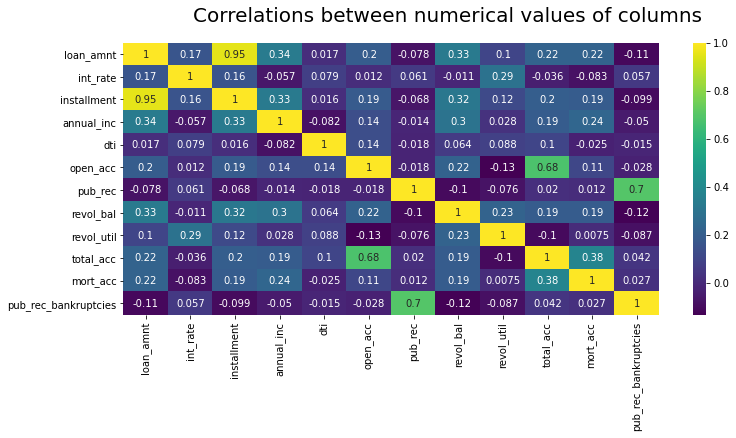

In [7]:
plt.figure(figsize = (12,5))
plt.suptitle('Correlations between numerical values of columns', fontsize = 20)
sns.heatmap(data.corr(), annot = True, cmap = 'viridis')

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

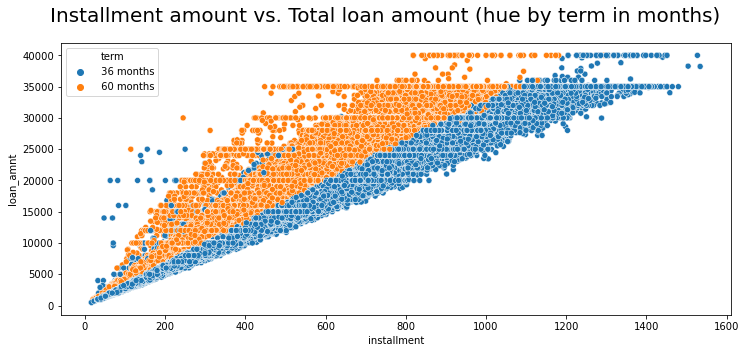

In [8]:
plt.figure(figsize = (12,5))
plt.suptitle('Installment amount vs. Total loan amount (hue by term in months)', fontsize = 20)
sns.scatterplot(x= 'installment', y = 'loan_amnt', data = data, hue = 'term')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

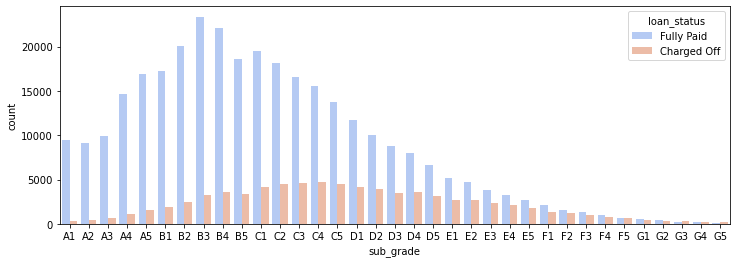

In [9]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(data['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data = data, hue = 'loan_status', 
              order = subgrade_order, palette = 'coolwarm')

<AxesSubplot:>

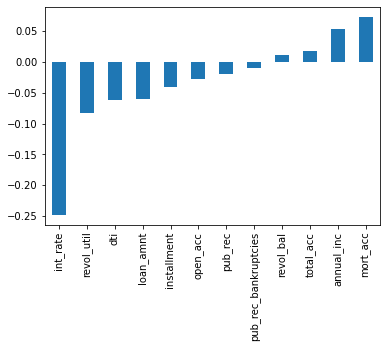

In [10]:
data['loan_repaid'] = data['loan_status'].map({'Fully Paid':1, 'Charged Off':0})
data.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind = 'bar')

In [11]:
#percentage of column entries that are missing
data.isnull().sum(axis=0)/len(data)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

<AxesSubplot:xlabel='emp_length', ylabel='count'>

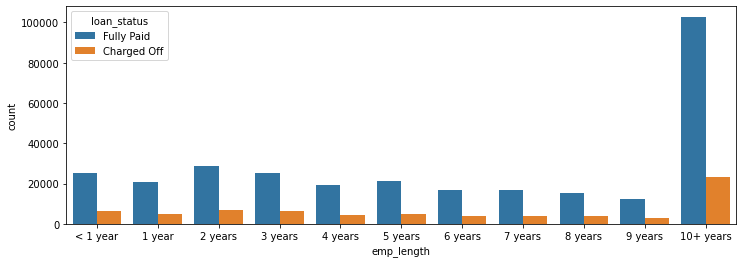

In [12]:
data = data.drop('emp_title', axis = 1)
data = data.drop('title', axis = 1)
data = data.drop('grade',axis = 1)
data = data.drop('issue_d', axis = 1)
sorted(data['emp_length'].dropna().unique())
emp_len_ord = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
plt.figure(figsize = (12,4))
sns.countplot(x='emp_length', data = data , order = emp_len_ord, hue = 'loan_status')

In [13]:
emp_co = data[data['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_fp = data[data['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
emp_co/(emp_co+emp_fp)#not significant
data = data.drop('emp_length', axis = 1)

In [14]:
## complete missing data
data['mort_acc'].value_counts()
data.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [15]:
#filling mort accoun columns with total accounts avergaed since they are slightyly correlated
total_acc_avg = data.groupby('total_acc').mean()['mort_acc']
def fillin_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return(total_acc_avg[total_acc])
    else:
        return(mort_acc)
data['mort_acc'] = data.apply(lambda x: fillin_mort_acc(x['total_acc'], x['mort_acc']), axis = 1)

In [16]:
#lastly drop the remaining missing value rows
data = data.dropna()
data.isnull().sum(axis=0)/len(data)*100

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
sub_grade               0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
loan_repaid             0.0
dtype: float64

## Categorical Variables

In [17]:
data['address'].value_counts()

USCGC Smith\nFPO AE 70466                            8
USS Smith\nFPO AP 70466                              8
USS Johnson\nFPO AE 48052                            8
USNS Johnson\nFPO AE 05113                           8
USNS Johnson\nFPO AP 48052                           7
                                                    ..
43570 Maxwell Field Apt. 502\nEast John, NH 22690    1
9983 Turner Cove\nSouth Gregmouth, WV 70466          1
1312 Cody Shoal\nRalphfurt, CO 29597                 1
3841 Liu Crest\nClarkchester, NC 29597               1
787 Michelle Causeway\nBriannaton, AR 48052          1
Name: address, Length: 392898, dtype: int64

In [18]:
data['zip_code'] = data['address'].apply(lambda addr: addr[-5:])
data= data.drop('address',axis = 1)

In [19]:
data['term'] = data['term'].apply(lambda term: int(term[:3]))
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [20]:
data['home_ownership'] = data['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [21]:
#convert into dummy variables
dummies = pd.get_dummies(data[['sub_grade', 'verification_status', 'application_type', 'initial_list_status', 'purpose', 'home_ownership', 'zip_code']], 
                         drop_first = True)
data = pd.concat([data.drop(['sub_grade', 'verification_status', 'application_type', 'initial_list_status', 'purpose', 'home_ownership', 'zip_code'] ,axis = 1), dummies], axis = 1)

In [22]:
data.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,home_ownership_RENT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,1990,16.0,0.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,2004,17.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,2007,13.0,0.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,2006,6.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,1999,13.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [23]:
data.to_csv('lending_club_loan_clean.csv')